In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

# Allow several prints in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fifa-20-complete-player-dataset/players_16.csv
/kaggle/input/fifa-20-complete-player-dataset/players_15.csv
/kaggle/input/fifa-20-complete-player-dataset/players_18.csv
/kaggle/input/fifa-20-complete-player-dataset/players_19.csv
/kaggle/input/fifa-20-complete-player-dataset/players_20.csv
/kaggle/input/fifa-20-complete-player-dataset/teams_and_leagues.csv
/kaggle/input/fifa-20-complete-player-dataset/players_17.csv


In [2]:
file = '/kaggle/input/fifa-20-complete-player-dataset/players_20.csv'
df = pd.read_csv(file)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [3]:
df.shape
df.describe().T

(18278, 104)

,count,mean,std,min,25%,50%,75%,max
sofifa_id,18278.0,2.197389e+05,2.796020e+04,768.0,204445.50,226165.0,240795.75,252905.0
age,18278.0,2.528329e+01,4.656964e+00,16.0,22.00,25.0,29.00,42.0
height_cm,18278.0,1.813622e+02,6.756961e+00,156.0,177.00,181.0,186.00,205.0
weight_kg,18278.0,7.527634e+01,7.047744e+00,50.0,70.00,75.0,80.00,110.0
overall,18278.0,6.624499e+01,6.949953e+00,48.0,62.00,66.0,71.00,94.0
potential,18278.0,7.154689e+01,6.139669e+00,49.0,67.00,71.0,75.00,95.0
value_eur,18278.0,2.484038e+06,5.585481e+06,0.0,325000.00,700000.0,2100000.00,105500000.0
wage_eur,18278.0,9.456943e+03,2.135171e+04,0.0,1000.00,3000.0,8000.00,565000.0
international_reputation,18278.0,1.103184e+00,3.788605e-01,1.0,1.00,1.0,1.00,5.0
weak_foot,18278.0,2.944250e+00,6.646562e-01,1.0,3.00,3.0,3.00,5.0


there is over 100 features and here is a list of questions we can try to answer with the data:
1. univariate
    1.1 what is the distribution of the age, height, weight, nationality, club, overall, potential, wage, preferred/weak foot etc.
2. bivariate
    2.1 distribution of players, age, wage, potential per country, per club, per position
    2.2 relationship between age and potential, age and overall
3. multivariate
    3.1 model and predict potential, overall, wage based on other variables
    
As suggested by the dataset provider we can try to put up a pesudo team and see how much it will cost; or we can propose a budget and suggest the team with highest overall or potential.

In [4]:
print("There are {} players in this dataset".format(df.sofifa_id.nunique()))
print('Age:')
print("  The average age is {:.2f}, \n  half of the the players are younger than {}, the oldest player is {}, the youngest is {}, \n  the age span between 1st and 3rd quartiles is {} years".format(
    df.age.mean(), df.age.median(), df.age.max(), df.age.min(), df.age.quantile(0.75) - df.age.quantile(.25)))
print('Height/Weight:')
print("  The average height is {:.2f} cm ({} feet {:.2f} in); the average weight is {:.2f} kg ({:.2f} lbs)".format(df.height_cm.mean(), int(df.height_cm.mean()*0.0328), df.height_cm.mean()*0.394 % 12, df.weight_kg.mean(), df.weight_kg.mean()*2.2))

There are 18278 players in this dataset
Age:
  The average age is 25.28, 
  half of the the players are younger than 25.0, the oldest player is 42, the youngest is 16, 
  the age span between 1st and 3rd quartiles is 7.0 years
Height/Weight:
  The average height is 181.36 cm (5 feet 11.46 in); the average weight is 75.28 kg (165.61 lbs)


I really need to lose some weight

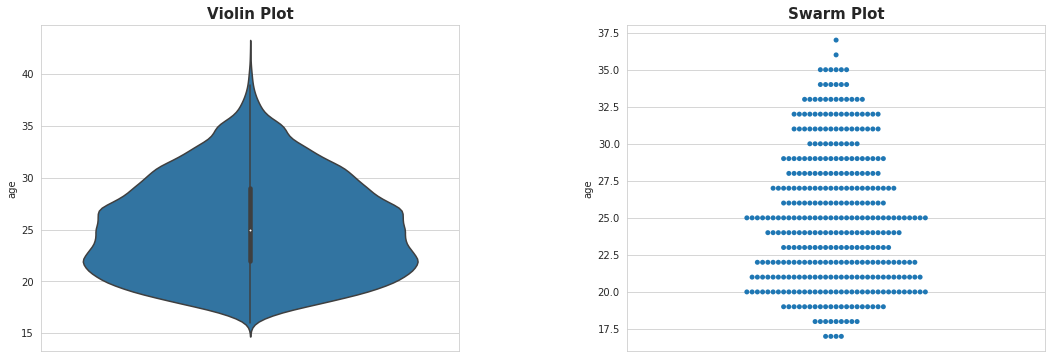

In [5]:
f,a = plt.subplots(1,2,figsize=(18,6))
f.subplots_adjust(wspace = .4)
sns.violinplot(df.age, inner = 'box', orient='v', ax=a[0])
a[0].set_title('Violin Plot', fontsize=15, fontweight='bold')
a[0].set_xlabel('')

# swarmplot is expensive
sns.swarmplot(y = df.age.sample(frac = 0.02), ax=a[1])
a[1].set_title('Swarm Plot', fontsize=15, fontweight='bold')
a[1].set_xlabel('');

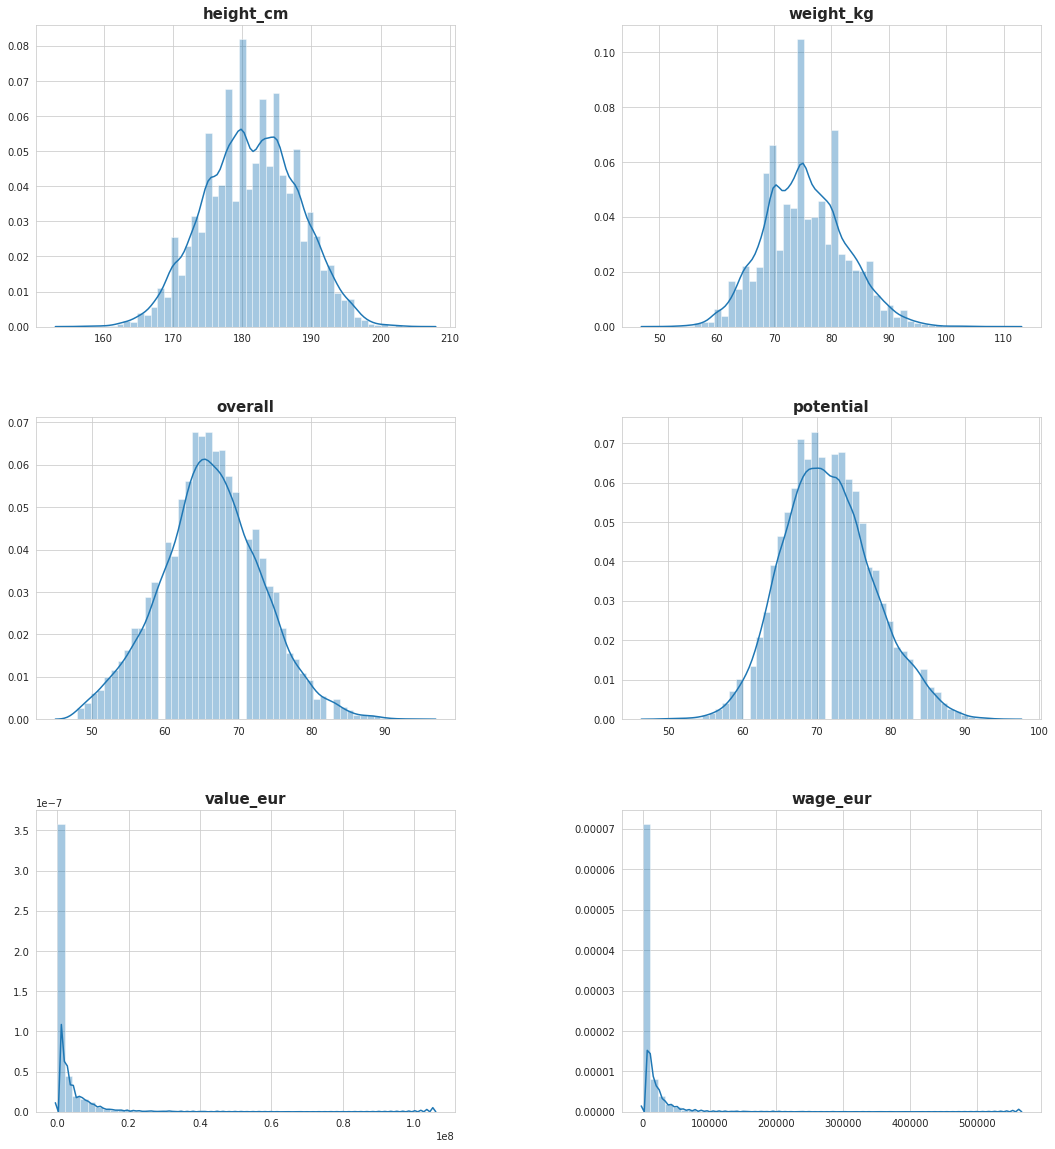

In [6]:
cols = ['height_cm','weight_kg','overall','potential','value_eur','wage_eur']
f,a = plt.subplots(3,2,figsize=(18,20))
f.subplots_adjust(wspace = .4, hspace = .3)
for i,col in enumerate(cols):
    sns.distplot(df[col], ax=a[i//2][i%2])
    a[i//2][i%2].set_title(col, fontsize=15, fontweight='bold')
    a[i//2][i%2].set_xlabel('')
plt.show();

like most 'high risk high return' business, the income is severely skewed

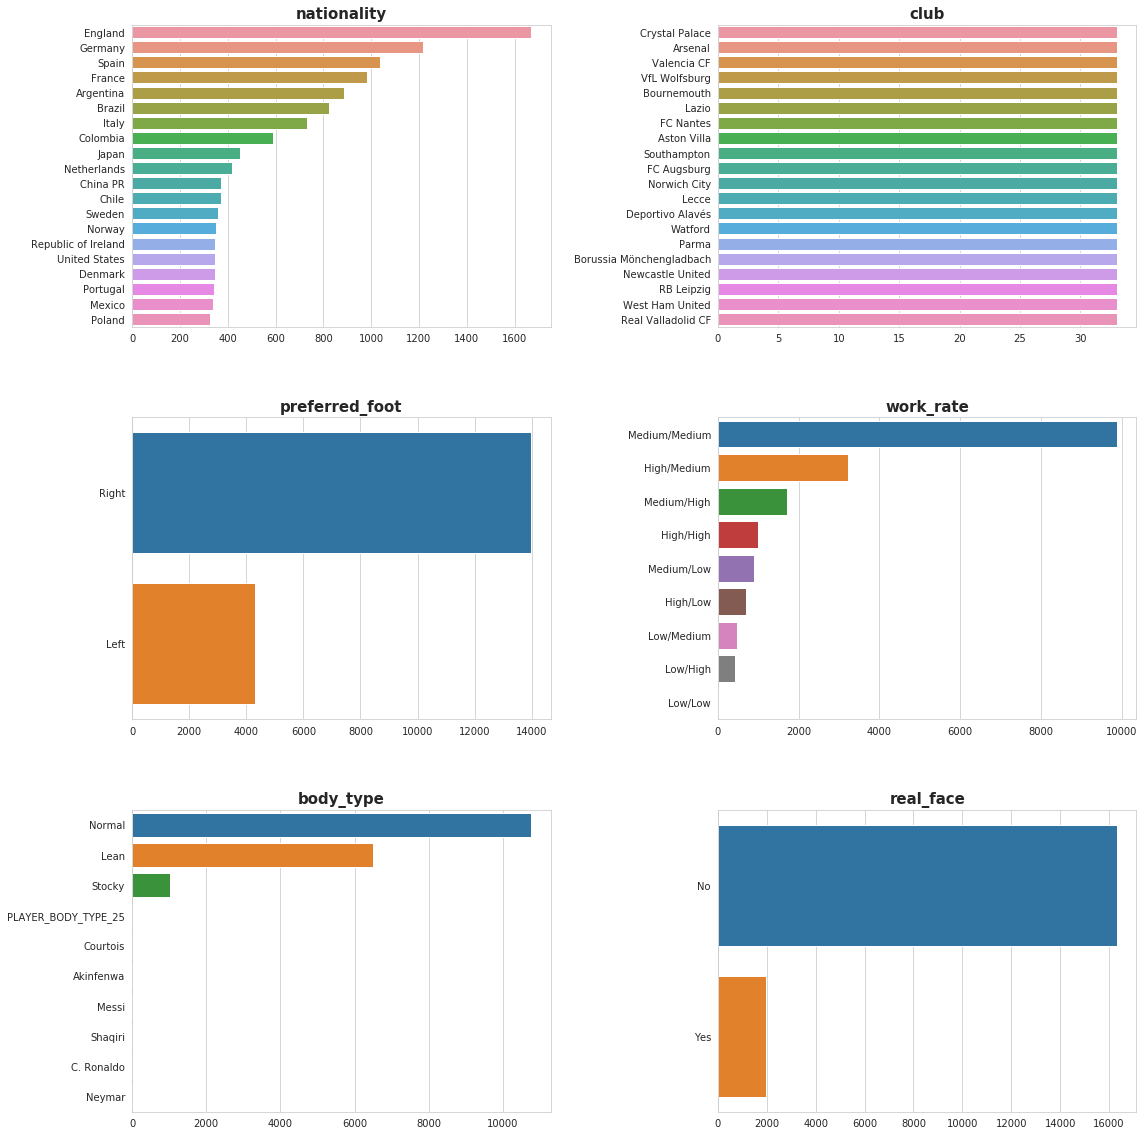

In [7]:
cols = ['nationality','club','preferred_foot','work_rate','body_type','real_face']

f,a = plt.subplots(3,2,figsize=(18,20))
f.subplots_adjust(wspace = .4, hspace = .3)
for i,col in enumerate(cols):
    sns.barplot(df[col].value_counts()[:20], df[col].value_counts().index[:20], ax=a[i//2][i%2])
    a[i//2][i%2].set_title(col, fontsize=15, fontweight='bold')
    a[i//2][i%2].set_xlabel('')
plt.show();

In [8]:
print("There are over {} English soccer players; it is a little surprising that China has {} players. In contrast, India has {} players and Russia has {} players".format(
df[df.nationality == 'England'].sofifa_id.size, df[df.nationality == 'China PR'].sofifa_id.size, df[df.nationality == 'India'].sofifa_id.size, df[df.nationality == 'Russia'].sofifa_id.size))
print("There seems a cap for how many players a club can have. Need to re-investigate.")
print("There are {} right-footed players and {} left-footed players; the ratio is {:.2f}".format(df[df.preferred_foot == 'Right'].sofifa_id.size, df[df.preferred_foot == 'Left'].sofifa_id.size, df[df.preferred_foot == 'Right'].sofifa_id.size/df[df.preferred_foot == 'Left'].sofifa_id.size))
print("Most players act Medium/Medium work rate")
print("Most players has Normal body type; seems someone has a 'PLAYER_BODY_TYPE_25' body type, sounds like a factory series number.\n  He is {}, a {} years old {} player, severing {} club, wearing number {}".format(
df[df.body_type == 'PLAYER_BODY_TYPE_25'].long_name.iloc[0], int(df[df.body_type == 'PLAYER_BODY_TYPE_25'].age), df[df.body_type == 'PLAYER_BODY_TYPE_25'].nationality.iloc[0], df[df.body_type == 'PLAYER_BODY_TYPE_25'].club.iloc[0], int(df[df.body_type == 'PLAYER_BODY_TYPE_25'].team_jersey_number)))
print("Most players do not have 'real_face' attribute")

There are over 1667 English soccer players; it is a little surprising that China has 373 players. In contrast, India has 23 players and Russia has 81 players
There seems a cap for how many players a club can have. Need to re-investigate.
There are 13960 right-footed players and 4318 left-footed players; the ratio is 3.23
Most players act Medium/Medium work rate
Most players has Normal body type; seems someone has a 'PLAYER_BODY_TYPE_25' body type, sounds like a factory series number.
  He is Mohamed  Salah Ghaly, a 27 years old Egypt player, severing Liverpool club, wearing number 11
Most players do not have 'real_face' attribute


698


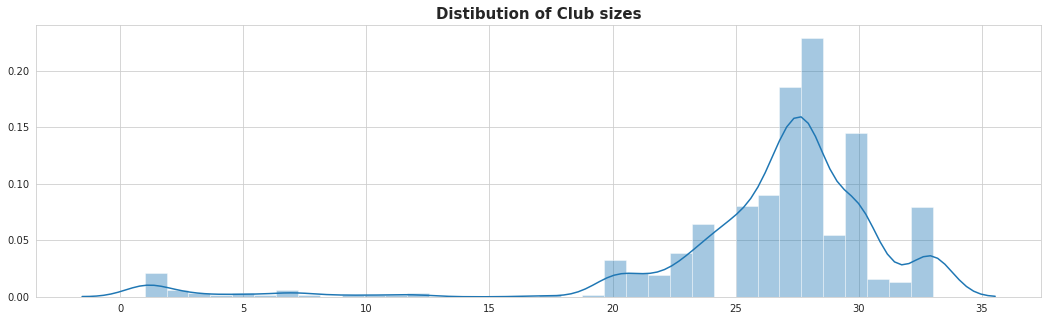

In [9]:
print(df.club.nunique())
# df.club.value_counts()

f,a = plt.subplots(1,1,figsize=(18,5))
# f.subplots_adjust(wspace = .4, hspace = .3)
sns.distplot(df.club.value_counts())
a.set_title("Distibution of Club sizes", fontsize=15, fontweight='bold')
a.set_xlabel('')
plt.show();

seems club has a cap of 33 players; and we need at least 1 player to form a club.

Per country

In [10]:
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
import pycountry
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins

countries = df['nationality'].value_counts()

world_data = pd.DataFrame({
   'name':list(countries.index.tolist()[:5]),
    'lat':[52.35,51.16, 40.46, 46.23, -38.42,],
   'lon':[-1.17,10.45, -3.75, 2.21, -63.62,],
   'Players':list(countries.iloc[:5]),
})

world_data.name.tolist()
# create map and display it
world_map = folium.Map(location=[10, -20], zoom_start=2.4,tiles='Stamen Toner')

for lat, lon, value, name in zip(world_data['lat'], world_data['lon'], world_data['Players'], world_data['name']):
    folium.CircleMarker([lat, lon],
                        radius=value*0.01,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases on 30th Jan 2020</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(world_map)
world_map

['England', 'Germany', 'Spain', 'France', 'Argentina']

There are 162 countries in the dataset


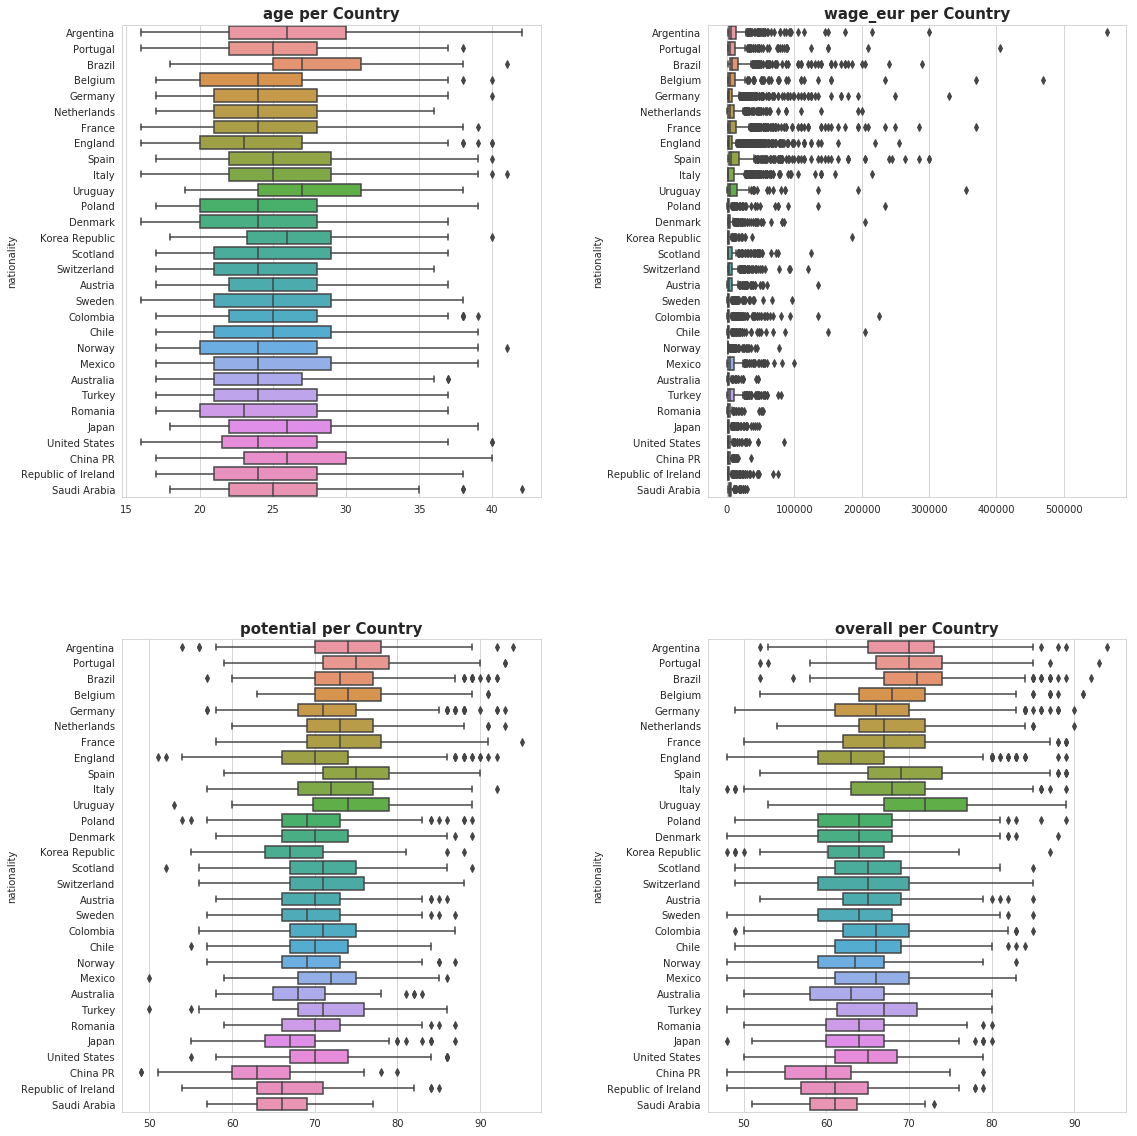

In [11]:
# 2.1 distribution of players, age, wage, potential per country, per club, per position
#     2.2 relationship between age and potential, age and overall
    
    
print("There are {} countries in the dataset".format(df.nationality.nunique()))
top30 = df.nationality.value_counts()[:30]
top30_df = df[df['nationality'].isin(top30.index.tolist())]
# top30_df.head()
# sns.boxplot(top30_df.age, top30_df.nationality);

cols = ['age','wage_eur','potential','overall']

f,a = plt.subplots(2,2,figsize=(18,20))
f.subplots_adjust(wspace = .4, hspace = .3)
for i,col in enumerate(cols):
    sns.boxplot(top30_df[col], top30_df.nationality, ax=a[i//2][i%2])
    a[i//2][i%2].set_title(col + " per Country", fontsize=15, fontweight='bold')
    a[i//2][i%2].set_xlabel('')
plt.show();

Per Club

There are 698 clubs in the dataset


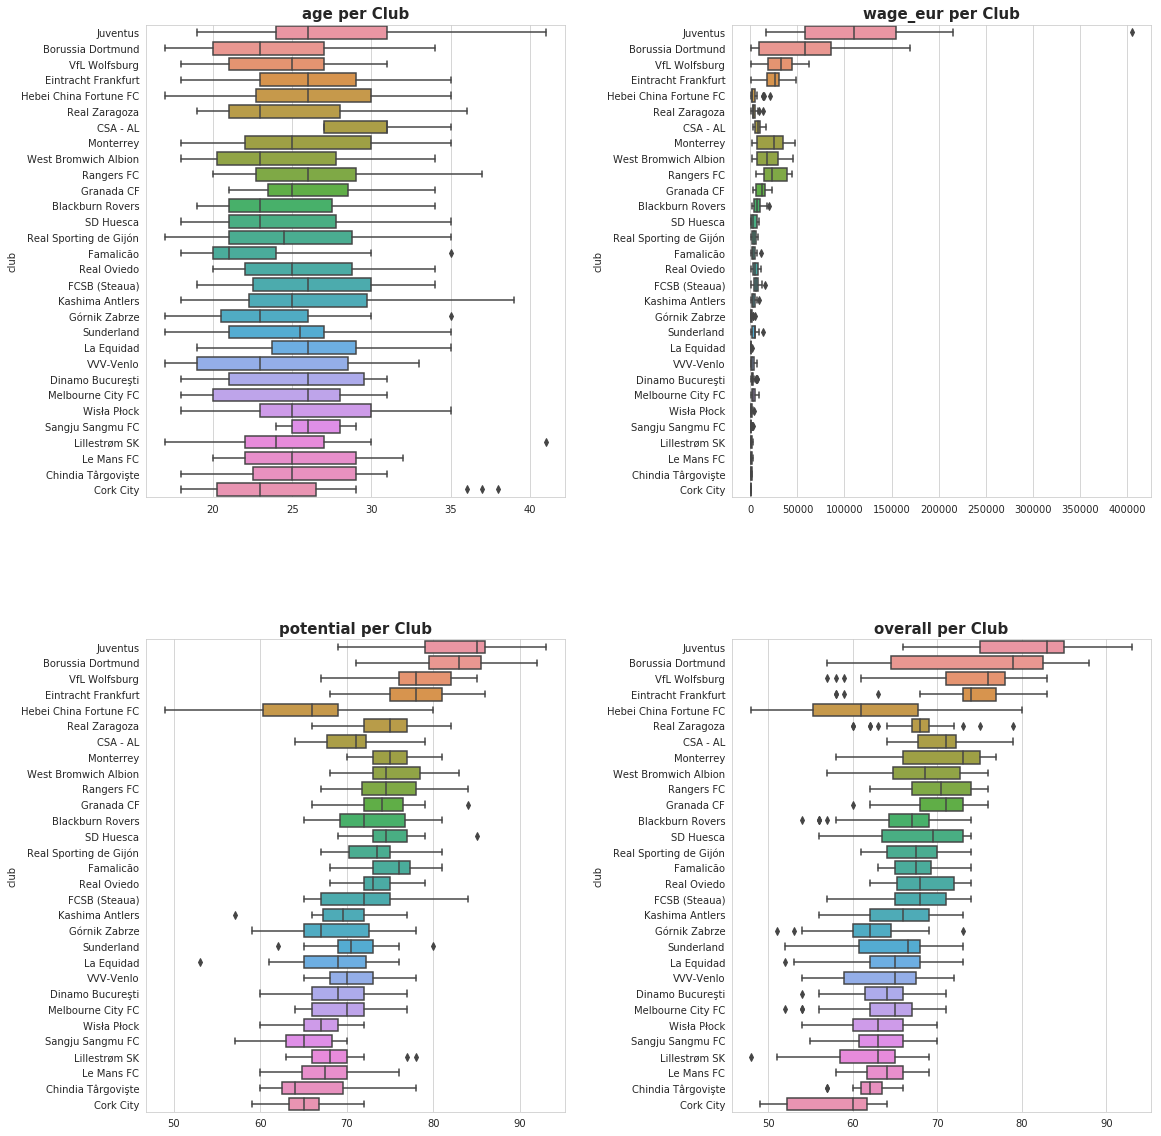

In [12]:
print("There are {} clubs in the dataset".format(df.club.nunique()))
random30 = df.club.value_counts().sample(30)
# print(df.club.value_counts().value_counts())
random30_df = df[df['club'].isin(random30.index.tolist())]

cols = ['age','wage_eur','potential','overall']

f,a = plt.subplots(2,2,figsize=(18,20))
f.subplots_adjust(wspace = .4, hspace = .3)
for i,col in enumerate(cols):
    sns.boxplot(random30_df[col], random30_df.club, ax=a[i//2][i%2])
    a[i//2][i%2].set_title(col + " per Club", fontsize=15, fontweight='bold')
    a[i//2][i%2].set_xlabel('')
plt.show();

Age vs. performance

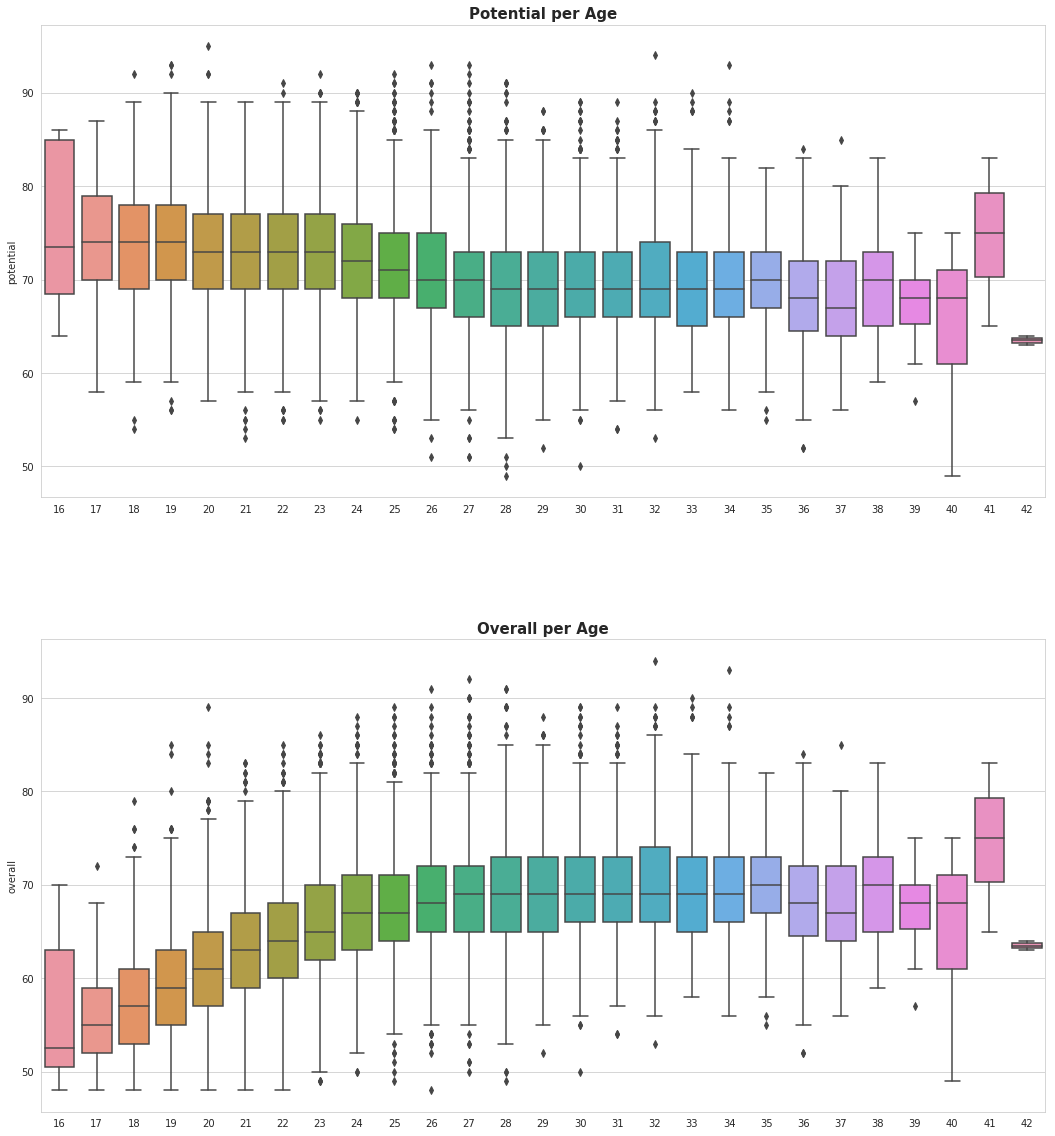

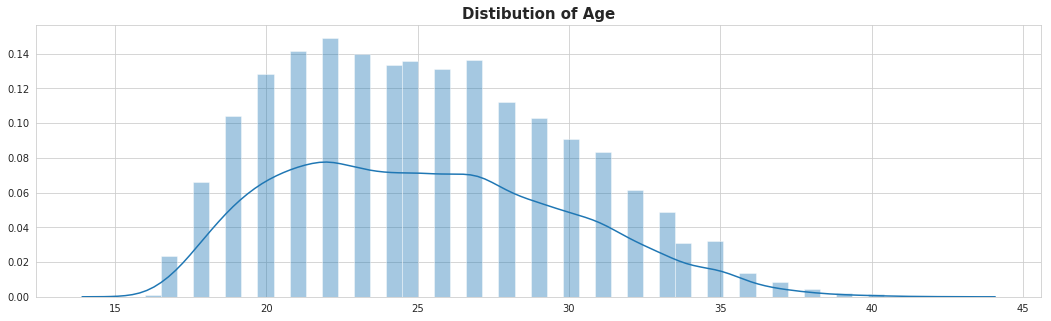

In [13]:
f,a = plt.subplots(2,1,figsize=(18,20))
f.subplots_adjust(wspace = .4, hspace = .3)
sns.boxplot(df.age, df.potential, orient='v', ax=a[0])
a[0].set_title("Potential per Age", fontsize=15, fontweight='bold')
a[0].set_xlabel('')

sns.boxplot(df.age, df.overall, orient='v', ax=a[1])
a[1].set_title("Overall per Age", fontsize=15, fontweight='bold')
a[1].set_xlabel('')
plt.show();
# sns.boxplot(df.potential, df.age, orient='h');

f,a = plt.subplots(1,1,figsize=(18,5))
# f.subplots_adjust(wspace = .4, hspace = .3)
sns.distplot(df.age)
a.set_title("Distibution of Age", fontsize=15, fontweight='bold')
a.set_xlabel('')
plt.show();

Youger players have higher Potentials but lower Overall; The Overall increase with age as players accumulate experiences and credits; This is a statistic perspective, may not apply to individuals; eg. there is a peak in both potential and overall at age 41, that does not mean players achieve a sudden performance boost at age 41. It is more reasonable to think that if a player is still playing over 40 years old, he must be really good at the game.

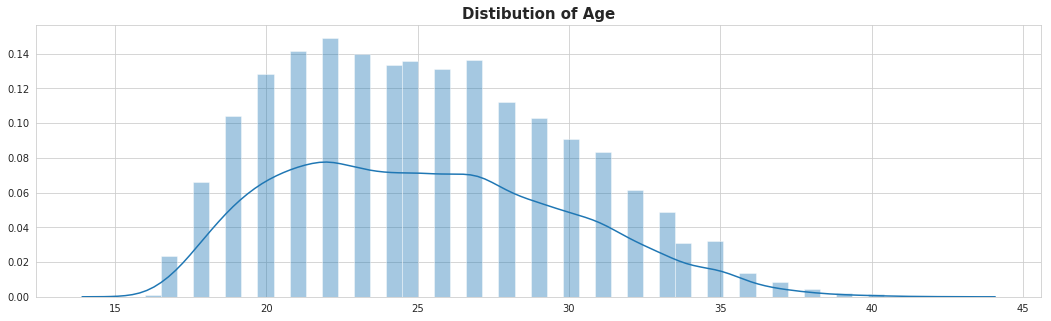

In [14]:
f,a = plt.subplots(1,1,figsize=(18,5))
# f.subplots_adjust(wspace = .4, hspace = .3)
sns.distplot(df.age)
a.set_title("Distibution of Age", fontsize=15, fontweight='bold')
a.set_xlabel('')
plt.show();

In [15]:
df.isnull().sum()[df.isnull().sum() != 0]

release_clause_eur       1298
player_tags             16779
team_position             240
team_jersey_number        240
loaned_from             17230
joined                   1288
contract_valid_until      240
nation_position         17152
nation_jersey_number    17152
pace                     2036
shooting                 2036
passing                  2036
dribbling                2036
defending                2036
physic                   2036
gk_diving               16242
gk_handling             16242
gk_kicking              16242
gk_reflexes             16242
gk_speed                16242
gk_positioning          16242
player_traits           10712
ls                       2036
st                       2036
rs                       2036
lw                       2036
lf                       2036
cf                       2036
rf                       2036
rw                       2036
lam                      2036
cam                      2036
ram                      2036
lm        

Predicting can be made via regression or NN deeplearning. Save them for the next kernel.